## $\color{SkyBlue}{\text{Hypothesis 1}}$
#### $\color{SkyBlue}{\text{Cole Krant}}$

### Description

To what extend to a players height and weight contribute to the teams overall performance?

<br>
<br>

$\rule{27cm}{0.4pt}$ 
### Import Libraries

In [1]:
import numpy as np
import pandas as pd

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [2]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [3]:
#--------------------------------------------------------------------------------#
def kMeans(df, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))
    centroids = df.sample(k).values
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [74]:
#--------------------------------------------------------------------------------#
## Statistics for each team, by season
### Basic Info
#   id
#   player name
#   team abbreviation
#   age
#   player height
#   player weight
df_seasons = pd.read_csv("data/all_seasons.csv")
df_seasons = df_seasons[["id", "player_name", "team_abbreviation", "age", "player_height", "player_weight", "season"]]

df_players_by_seasons = df_seasons[ (df_seasons["season"] == "2018-19") | 
                                    (df_seasons["season"] == "2019-20") | 
                                    (df_seasons["season"] == "2020-21") | 
                                    (df_seasons["season"] == "2021-22") |
                                    (df_seasons["season"] == "2022-23") |
                                    (df_seasons["season"] == "2023-24") ]

for i in range(len(df_players_by_seasons)):
    df_players_by_seasons["season"].iloc[i] = df_players_by_seasons["season"].iloc[i][0:4]

df_players_by_seasons.head()
#--------------------------------------------------------------------------------#
### Now we have created a dataframe that contains:
#     id, player_name, team_abbreviation, age, player_height, player_weight, season

C:\Users\ColeK\AppData\Local\Temp\ipykernel_13456\363574390.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_by_seasons["season"].iloc[i] = df_players_by_seasons["season"].iloc[i][0:4]
C:\Users\ColeK\AppData\Local\Temp\ipykernel_13456\363574390.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_by_seasons["season"].iloc[i] = df_players_by_seasons["season"].iloc[i][0:4]
C:\Users\ColeK\AppData\Local\Temp\ipykernel_13456\363574390.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,id,player_name,team_abbreviation,age,player_height,player_weight,season
10101,10101,Zhou Qi,HOU,23.0,215.90,95.25432,2018
10102,10102,Frank Mason,SAC,25.0,180.34,86.18248,2018
10103,10103,Frank Ntilikina,NYK,20.0,198.12,90.71840,2018
10104,10104,Fred VanVleet,TOR,25.0,182.88,88.45044,2018
10105,10105,Furkan Korkmaz,PHI,21.0,200.66,86.18248,2018


In [75]:
# #--------------------------------------------------------------------------------#
# ## Team Statistics
# #   full name
# #   abbreviation (id)
# df_team = pd.read_csv("data/team.csv")
# df_team = df_team[["full_name", "abbreviation"]]
# df_team.head()

# ## Rankings
# #   Abbreviation (id)
# #   Rank
# #   Year
# #   Conference
# df_rankings = pd.read_csv("data/rankings.csv")
# # df_rankings.merge(df_rankings, df_team, left_on="Team", right_on="abbreviation")
# df_rankings.head()
# #--------------------------------------------------------------------------------#

### Dataframe Concatenation

In [105]:
#--------------------------------------------------------------------------------#
### Pseudocode
# Objective: create a dataframe with the following columns
#       Loop through each year
#           Create a smaller dataframe with the given year
#           Loop through each team
#               Calculate average height of the team
#               Append the team, average height, and year to the new dataframe

# New Master Dataframe
dict = {'Team' : [], 'Avg_Height' : [], 'Avg_Weight' : [], 'Year' : []}
dfMaster = pd.DataFrame(dict)

# Get all unique years and teams
years = df_players_by_seasons["season"].unique()                    # get all unique years
teams = df_players_by_seasons["team_abbreviation"].unique()       # get all unique teams

##-- Loop through each year --##
for year in range(len(years)):

    # Create a smaller dataframe with the given year
    df_year = df_players_by_seasons[df_players_by_seasons["season"] == years[year]]
    # print(df_year[df_year["team_abbreviation"] == "HOU"])

    ##-- Loop through each team --##
    for team in range(len(teams)):

        # Calculate average height of the team
        avg_height = df_year[df_year["team_abbreviation"] == teams[team]]["player_height"].mean()  # calculate average height of the team
        avg_weight = df_year[df_year["team_abbreviation"] == teams[team]]["player_weight"].mean()  # calculate average height of the team
        # rank = df_year[df_year["team_abbreviation"] == teams[team]]["Rank"]                        # calculate average height of the team

        # Append the team, average height, and year to the new dataframe
        temp = {'Team' : teams[team], 'Avg_Height' : avg_height, 'Avg_Weight': avg_weight, 'Year' : years[year]}             # create a temporary dataframe
        df_temp = pd.DataFrame(temp, index=[0])

        # print(df_temp)

        dfMaster = pd.concat([dfMaster, df_temp], ignore_index = True)                             # append the temporary dataframe to the master dataframe
        dfMaster = dfMaster.reset_index(drop=True)


#--------------------------------------------------------------------------------#
print(dfMaster)

    Team  Avg_Height  Avg_Weight  Year
0    HOU  199.898000   99.291289  2018
1    SAC  200.510588   97.415552  2018
2    NYK  202.154118  101.257744  2018
3    TOR  198.966667   97.018289  2018
4    PHI  202.665263  101.509115  2018
..   ...         ...         ...   ...
145  BKN  198.882000   98.815017  2022
146  LAL  198.402222   94.523533  2022
147  ATL  198.966667   96.035506  2022
148  CLE  198.568235   99.149875  2022
149  CHI  198.867059   97.042006  2022

[150 rows x 4 columns]


In [106]:
#--------------------------------------------------------------------------------#
## Now that we have a dataframe with the team abbreviation, we need to join it with the full name
#    in order to get a rank for that year
df_team = pd.read_csv("data/team.csv")
df_team = df_team[["full_name", "abbreviation"]]
df_team.head()

## add a column to dfMaster that contains the full name of the team, join on abbreviation
dfMaster = dfMaster.merge(df_team, left_on="Team", right_on="abbreviation")
print(dfMaster)

#--------------------------------------------------------------------------------#

    Team  Avg_Height  Avg_Weight  Year        full_name abbreviation
0    HOU  199.898000   99.291289  2018  Houston Rockets          HOU
1    HOU  197.866000   98.610901  2019  Houston Rockets          HOU
2    HOU  197.889091   98.120197  2020  Houston Rockets          HOU
3    HOU  196.532500   97.493930  2021  Houston Rockets          HOU
4    HOU  200.490667  100.757903  2022  Houston Rockets          HOU
..   ...         ...         ...   ...              ...          ...
145  CHI  198.402222   96.287502  2018    Chicago Bulls          CHI
146  CHI  201.108235   99.443376  2019    Chicago Bulls          CHI
147  CHI  199.315294   98.589555  2020    Chicago Bulls          CHI
148  CHI  198.882000   97.499600  2021    Chicago Bulls          CHI
149  CHI  198.867059   97.042006  2022    Chicago Bulls          CHI

[150 rows x 6 columns]


In [111]:
#--------------------------------------------------------------------------------#
## Rankings
#   Abbreviation (id)
#   Rank
#   Year
#   Conference
df_rankings = pd.read_csv("data/rankings.csv")
# df_rankings.merge(df_rankings, df_team, left_on="Team", right_on="abbreviation")

for i in range(len(df_rankings)):
    if (df_rankings["Team"].iloc[i].find('*')):
        df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')

df_rankings.head()


## Drop the useless data
# dfMaster.dropna(inplace=True)
# print(df_rankings)
# dfMaster.merge(dfMaster, df_rankings, left_on="Team", right_on="Team")
# print(dfMaster.head(100))

# print(dfMaster.head(100))

# ## Split into by year
# df_18 = dfMaster[dfMaster["Year"] == 2018]
# df_19 = dfMaster[dfMaster["Year"] == 2019]
# df_20 = dfMaster[dfMaster["Year"] == 2020]
# df_21 = dfMaster[dfMaster["Year"] == 2021]
# df_22 = dfMaster[dfMaster["Year"] == 2022]
# df_23 = dfMaster[dfMaster["Year"] == 2023]

#--------------------------------------------------------------------------------#

C:\Users\ColeK\AppData\Local\Temp\ipykernel_13456\2170769126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')
C:\Users\ColeK\AppData\Local\Temp\ipykernel_13456\2170769126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')
C:\Users\ColeK\AppData\Local\Temp\ipykernel_13456\2170769126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Team,Rank,Year,Converence
0,Denver Nuggets,1,2023,West
1,Memphis Grizzlies,2,2023,West
2,Sacramento Kings,3,2023,West
3,Phoenix Suns,4,2023,West
4,Golden State Warriors,5,2023,West


$\rule{27cm}{0.4pt}$ 
### Begin K-Mean Analysis HEIGHT

In [22]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "Avg_Height"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "Avg_Height"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "Avg_Height"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "Avg_Height"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "Avg_Height"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "Avg_Height"]], k=3)
#--------------------------------------------------------------------------------#

ValueError: Cannot take a larger sample than population when 'replace=False'

### Plot the resulting graph

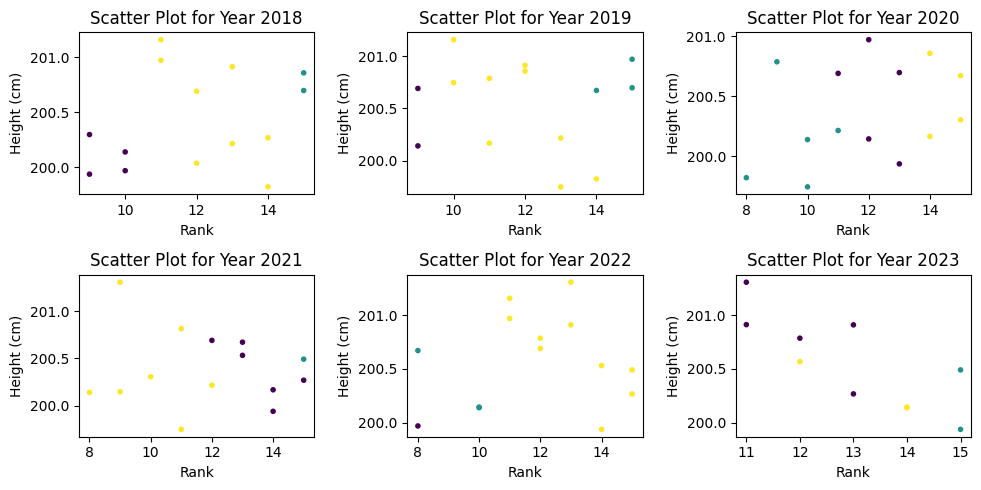

In [18]:
#--------------------------------------------------------------------------------#
import matplotlib.pyplot as plt

## Create lists to use for loop iteration for plotting
#  dataframes, contains all the dataframes for each year
#  clusters, contains all the clusters for each year
#  years, contains all the years

dataframes = [df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2018, 2019, 2020, 2021, 2022, 2023]

## Initialize Plot
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

## LOOP : Scatter Plot for each Year
for i, (year, dataframe) in enumerate(zip(years, dataframes)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['Avg_Height'], c=clusters[i], marker='*', s=200)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Height (cm)")
    ax.set_title("Scatter Plot for Year " + str(year))

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### k-Mean Analysis WEIGHT

In [10]:
#--------------------------------------------------------------------------------#
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "Avg_Weight"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "Avg_Weight"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "Avg_Weight"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "Avg_Weight"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "Avg_Weight"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "Avg_Weight"]], k=3)
#--------------------------------------------------------------------------------#

### Plot the resulting Graph

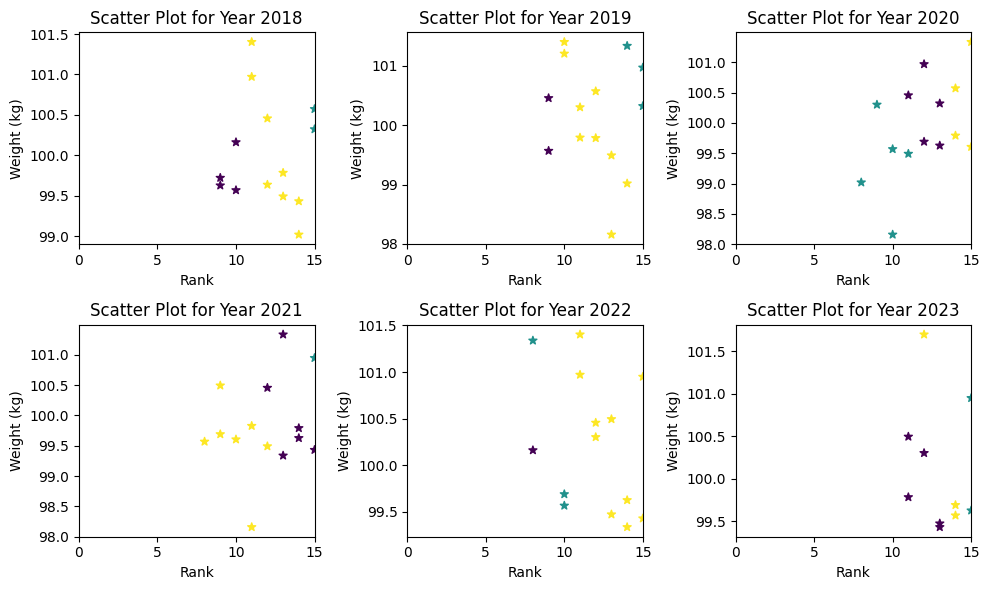

In [19]:
#--------------------------------------------------------------------------------#
import matplotlib.pyplot as plt

## Create lists to use for loop iteration for plotting
#  dataframes, contains all the dataframes for each year
#  clusters, contains all the clusters for each year
#  years, contains all the years

dataframes = [df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2018, 2019, 2020, 2021, 2022, 2023]

## Initialize Plot
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

## LOOP : Scatter Plot for each Year
for i, (year, dataframe) in enumerate(zip(years, dataframes)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['Avg_Weight'], c=clusters[i], marker='*', s=200)
    ax.set_xlim(0, 15)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Weight (kg)")
    ax.set_title("Scatter Plot for Year " + str(year))

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Analysis

Simply by looking at the average height and weight of each team across the years, it seems to have little affect on their final ranking for the season.

I attribute this to a couple reasons
1. Most teams have tall players
2. Averaging the team could make two very different teams seem equal: one where are all more or less the average height, and one where there are lots of very tall and very short people.

If we were to take this a step further, I would compare the heights and weights of each player given their position. This would solve the issues above.

Furthermore, clustering is pretty useless on these plots. The higher ranked teams are clustered closer together than the lower ranked teams, but in most cases they have the same height or weight. So it appears that feature has little affect on the clustering.

### Improvement

Since it appears the average height and weight doesn't appear to be a strong indication of their final rank in the NBA, perhaps we can take the maximum height 